---
title: "Lab 2 - Avocado Prices"
author: "Tyler Allen"
date: "2024-10-07"
format:
  html:
    cold-fold: true
    embed-resources: true
theme: "lux"
---

In [1]:
from google.colab import files
uploaded = files.upload()

Saving avocado-updated-2020.csv to avocado-updated-2020.csv


In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#| echo:false
#| eval: false

In [218]:
avocado = pd.read_csv('avocado-updated-2020.csv')
avocado

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.220,40873.280,2819.500,28287.420,49.900,9716.460,9186.930,529.530,0.000,conventional,2015,Albany
1,2015-01-04,1.790,1373.950,57.420,153.880,0.000,1162.650,1162.650,0.000,0.000,organic,2015,Albany
2,2015-01-04,1.000,435021.490,364302.390,23821.160,82.150,46815.790,16707.150,30108.640,0.000,conventional,2015,Atlanta
3,2015-01-04,1.760,3846.690,1500.150,938.350,0.000,1408.190,1071.350,336.840,0.000,organic,2015,Atlanta
4,2015-01-04,1.080,788025.060,53987.310,552906.040,39995.030,141136.680,137146.070,3990.610,0.000,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.470,1583056.270,67544.480,97996.460,2617.170,1414878.100,906711.520,480191.830,27974.750,organic,2020,Total U.S.
33041,2020-11-29,0.910,5811114.220,1352877.530,589061.830,19741.900,3790665.290,2197611.020,1531530.140,61524.130,conventional,2020,West
33042,2020-11-29,1.480,289961.270,13273.750,19341.090,636.510,256709.920,122606.210,134103.710,0.000,organic,2020,West
33043,2020-11-29,0.670,822818.750,234688.010,80205.150,10543.630,497381.960,285764.110,210808.020,809.830,conventional,2020,West Tex/New Mexico


**1. Briefly describe the data set. What information does it contain?**

This dataset shows avocado sales data with the following columns: date of obersvation, average price, total volume, the number of medium avocados sold, the number of large avocados sold, the number of extra large avocados sold, the number of bags sold, the number of small bags sold, the number of large bags sold, the number of extra large bags sold, the type of avocados, the year, and the geography. I looked what up what 4046, 4225, and 4770 meant with avocados to find that that meant what size they were.

**2. Clean the data in any way you see fit.**

In [219]:
#Checking for missing values?
missing_values = avocado.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64


In [220]:
#Checking for duplicate rows
duplicate_rows = avocado.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)

Number of duplicate rows: 0


In [221]:
#Renaming the avocado size columns
avocado_clean = avocado.rename(columns={
    '4046': 'small_avocados',
    '4225': 'large_avocados',
    '4770': 'xlarge_avocados'
})

In [222]:
# Counting distinct geographical regions
distinct_regions = avocado_clean['geography'].nunique()
print("Number of distinct geographical regions:", distinct_regions)

Number of distinct geographical regions: 54


In [223]:
#asked ChatGPT to list all the states for me to make this easier
states = [
    "Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware",
    "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky",
    "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri",
    "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina",
    "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina",
    "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia",
    "Wisconsin", "Wyoming"
]

#Categorizing geography into types and create a new 'region_type' column
def categorize_region_type(geography):
    if geography == "Total U.S.":
        return "National"
    elif geography in ["West", "Northeast", "South", "Midwest"]:
        return "Major Region"
    elif geography in states:
        return "State"
    else:
        return "Metro Region"

# Applying the function to create a new 'region_type' column
avocado_clean['region_type'] = avocado_clean['geography'].apply(categorize_region_type)

#Creating separate datasets for each type of region
national_data = avocado_clean[avocado_clean['region_type'] == 'National']
major_region_data = avocado_clean[avocado_clean['region_type'] == 'Major Region']
state_data = avocado_clean[avocado_clean['region_type'] == 'State']
metro_data = avocado_clean[avocado_clean['region_type'] == 'Metro Region']

# Displaying the first few rows to confirm
print(avocado_clean[['geography', 'region_type']].head())

              geography   region_type
0                Albany  Metro Region
1                Albany  Metro Region
2               Atlanta  Metro Region
3               Atlanta  Metro Region
4  Baltimore/Washington  Metro Region


In [224]:
#First few rows of each new dataset
print("National Data:")
print(national_data.head())

print("Major Region Data:")
print(major_region_data.head())

print("State Data:")
print(state_data.head())

print("Metro Region Data:")
print(metro_data.head())

National Data:
           date  average_price  total_volume  small_avocados  large_avocados  \
102  2015-01-04          0.950  31324277.730    12357161.340    13624083.050   
103  2015-01-04          1.460    612910.150      233286.130      216611.200   
210  2015-01-11          1.010  29063542.750    11544810.530    12134773.380   
211  2015-01-11          1.420    669528.880      270966.740      260971.600   
318  2015-01-18          1.030  29043458.850    11858139.340    11701947.800   

     xlarge_avocados  total_bags  small_bags  large_bags  xlarge_bags  \
102       844093.320 4498940.020 3585321.580  894945.630    18672.810   
103         4370.990  158641.830  115068.710   43573.120        0.000   
210       866574.660 4517384.180 3783261.160  718333.870    15789.150   
211         3830.420  133760.120  106844.490   26915.630        0.000   
318       831301.900 4652069.810 3873041.260  771093.200     7935.350   

             type  year   geography region_type  
102  convention

**3. Which major geographical region sold the most total organic, small Hass avocados in 2017?**

In [225]:
#Filtering the dataset for the year 2017, organic type, and major regions
organic_small_avocados_2017 = avocado_clean[
    (avocado_clean['year'] == 2017) &
    (avocado_clean['type'] == 'organic') &
    (avocado_clean['region_type'] == 'Major Region')
]

#Grouping by major region and sum the total sales of small avocados
total_small_avocados_by_region = organic_small_avocados_2017.groupby('geography')['small_avocados'].sum().reset_index()

#Finding the region with the most total small avocados sold
top_region = total_small_avocados_by_region.loc[total_small_avocados_by_region['small_avocados'].idxmax()]

print(top_region)

geography               West
small_avocados   1870206.290
Name: 1, dtype: object


The West was the major geographical region that sold the most total organic, small Hass avocados in 2017 with a count of 1,870,206.29.

**4.  Split the date variable into month, day, and year variables. In which month is the highest average volume of avocado sales?**

In [226]:
avocado_clean['date'] = pd.to_datetime(avocado_clean['date'])

# Splitting the date column into separate 'year', 'month', and 'day' columns
avocado_clean['year'] = avocado_clean['date'].dt.year
avocado_clean['month'] = avocado_clean['date'].dt.month
avocado_clean['day'] = avocado_clean['date'].dt.day

#Displaying the first few rows to confirm
print(avocado_clean[['date', 'year', 'month', 'day']].head())

        date  year  month  day
0 2015-01-04  2015      1    4
1 2015-01-04  2015      1    4
2 2015-01-04  2015      1    4
3 2015-01-04  2015      1    4
4 2015-01-04  2015      1    4


In [227]:
#asked ChatGTP for the python equivalent of options(scipen=999)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Grouping by month and calculate the average total volume of avocado sales
average_volume_by_month = avocado_clean.groupby('month')['total_volume'].mean().reset_index()

#Finding the month with the highest average total volume
month_with_highest_avg_volume = average_volume_by_month.loc[average_volume_by_month['total_volume'].idxmax()]

print(month_with_highest_avg_volume)

month                5.000
total_volume   1123632.254
Name: 4, dtype: float64


The 5th month, May, has the highest average volume of avocado sales with an average volume of 1,123,632.254.

**5. Which metro area geographical regions sold the most total avocados? Plot side-by-side box-plots of the total volume for only the five metro geographical regions with the highest averages for the total_volume variable.**

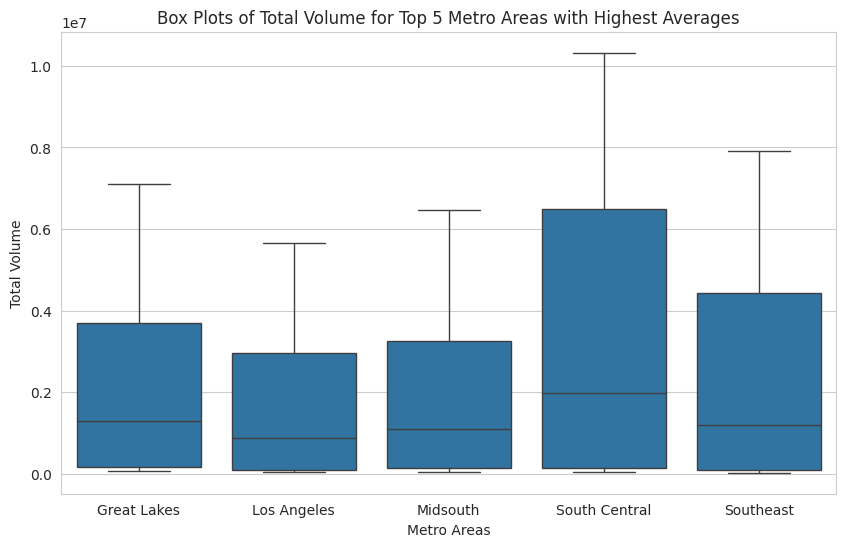

In [271]:
#Filtering data for metro regions only
metro_data = avocado_clean[avocado_clean['region_type'] == 'Metro Region']

#Grouping by geography and then calculating the mean total volume for each metro area
average_volume_by_metro = metro_data.groupby('geography')['total_volume'].mean().reset_index()

#Finding the top 5 metro areas with the highest average total volume
top_5_metros = average_volume_by_metro.nlargest(5, 'total_volume')['geography']

#Filtering the metro data to include only the top 5 metro areas
top_5_metro_data = metro_data[metro_data['geography'].isin(top_5_metros)]

#Box plots - used ChatGPT to help get it to work
plt.figure(figsize=(10, 6))
sns.boxplot(x='geography', y='total_volume', data=top_5_metro_data)
plt.title('Box Plots of Total Volume for Top 5 Metro Areas with Highest Averages')
plt.ylabel('Total Volume')
plt.xlabel('Metro Areas')
plt.show()

**6. From your cleaned data set, create a data set with only these California regions and answer the following questions about these California regions only.**

In [229]:
#Filtering the dataset for the four California metro regions
california_regions = ["Los Angeles", "San Diego", "Sacramento", "San Francisco"]
california_data = avocado_clean[avocado_clean['geography'].isin(california_regions)]

print(california_data.head())

         date  average_price  total_volume  small_avocados  large_avocados  \
44 2015-01-04          0.850   2682159.950     1837999.650      524430.470   
45 2015-01-04          1.250     54495.540       47721.510        1723.400   
80 2015-01-04          1.050    430138.880      110693.690      270107.610   
81 2015-01-04          1.330      9213.490        3727.520        4327.520   
82 2015-01-04          0.940    461607.330      244152.260      165299.330   

    xlarge_avocados  total_bags  small_bags  large_bags  xlarge_bags  \
44        64225.780  255504.050  215571.800   36981.720     2950.530   
45            0.000    5050.630    5050.630       0.000        0.000   
80         9737.500   39600.080   39600.080       0.000        0.000   
81            0.000    1158.450    1158.450       0.000        0.000   
82        15302.750   36852.990   30884.290    5595.000      373.700   

            type  year    geography   region_type  month  day  
44  conventional  2015  Los Angele

**7. In which California regions is the price of organic versus conventional avocados most different? Support your answer with a few summary statistics AND a visualization.**

Summary statistics of price differences between organic and conventional avocados:
type           conventional  organic  price_diff
geography                                       
Los Angeles           1.047    1.575       0.528
Sacramento            1.295    1.874       0.578
San Diego             1.114    1.798       0.685
San Francisco         1.400    2.119       0.719


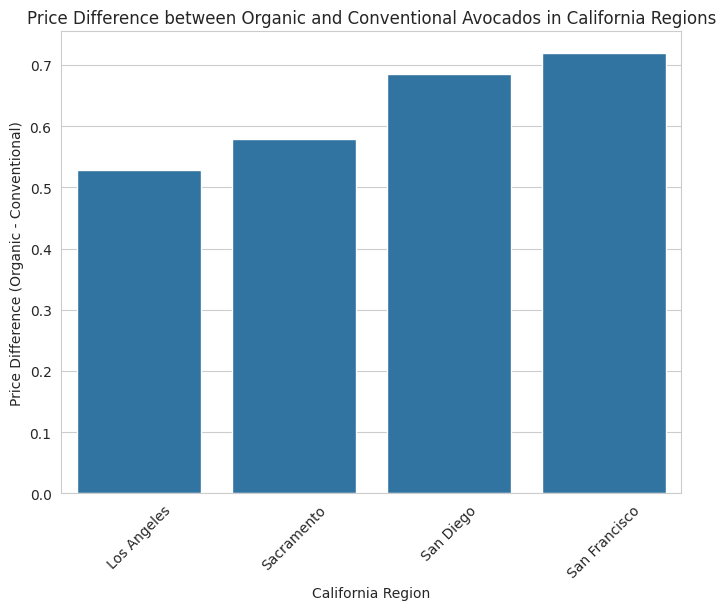

In [230]:
#Filtering the dataset for the four California metro regions (already done in previous steps) and ensure only organic and conventional avocados are included
california_data_filtered = california_data[california_data['type'].isin(['organic', 'conventional'])]

#Grouping by geography and type to calculate the average price
avg_price_by_type = california_data_filtered.groupby(['geography', 'type'])['average_price'].mean().reset_index()

#Pivoting the data to compare organic vs conventional prices side by side (ChatGPT helped me with this)
price_difference = avg_price_by_type.pivot(index='geography', columns='type', values='average_price')

#Calculating the price difference (organic - conventional)
price_difference['price_diff'] = price_difference['organic'] - price_difference['conventional']

#Summary statistics
print("Summary statistics of price differences between organic and conventional avocados:")
print(price_difference)

#Visualization
plt.figure(figsize=(8, 6))
sns.barplot(x=price_difference.index, y=price_difference['price_diff'])
plt.title('Price Difference between Organic and Conventional Avocados in California Regions')
plt.ylabel('Price Difference (Organic - Conventional)')
plt.xlabel('California Region')
plt.xticks(rotation=45)
plt.show()


**8. The following plot shows, for all four California regions, the proportion of the average Hass avocado sales that are small, large, or extra large; conventional vs. organic. Recreate the plot; you do not have to replicate the exact finishing touches - e.g., color, theme - but your plot should resemble the content of this plot.**

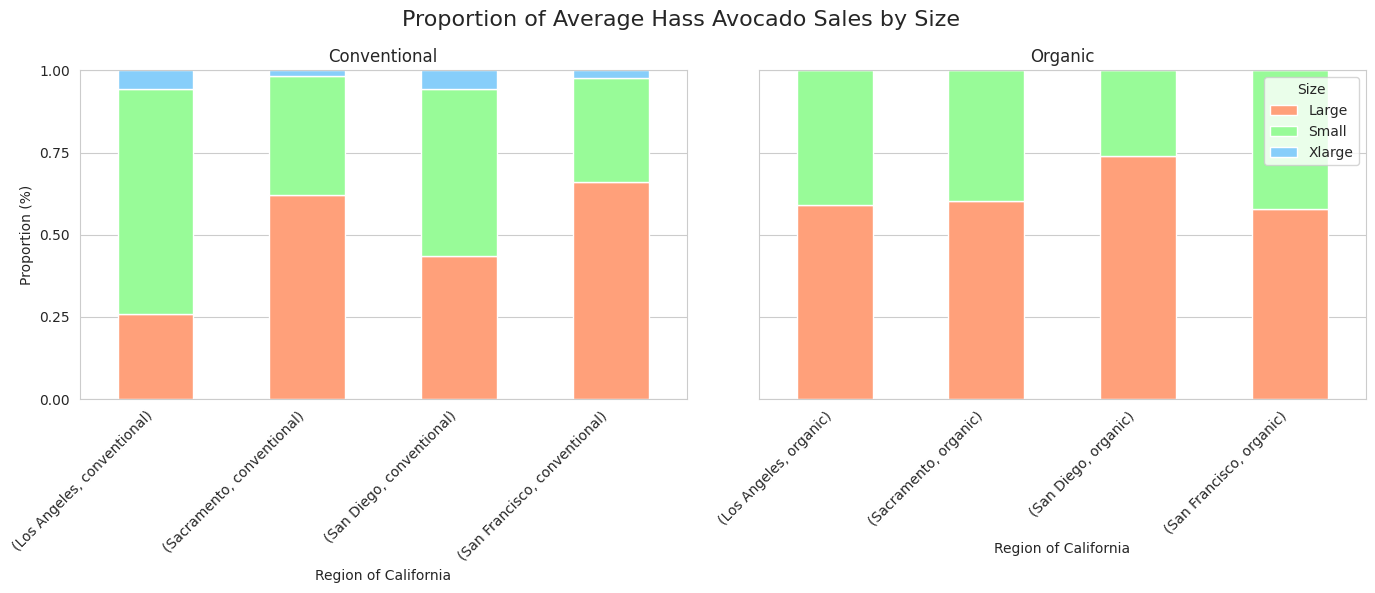

In [231]:
#Melting the data to get 'small_avocados', 'large_avocados', and 'xlarge_avocados' as one variable
#used ChatGPT for this step
california_data_melted = california_data.melt(id_vars=['geography', 'type', 'month'],
                                              value_vars=['small_avocados', 'large_avocados', 'xlarge_avocados'],
                                              var_name='size', value_name='sales')

#Calculating the total sales for each geography and type
california_data_melted['total_sales'] = california_data_melted.groupby(['geography', 'type'])['sales'].transform('sum')

#Calculating the proportion of each size category
california_data_melted['proportion'] = california_data_melted['sales'] / california_data_melted['total_sales']

california_data_melted['size'] = california_data_melted['size'].replace({
    'small_avocados': 'Small',
    'large_avocados': 'Large',
    'xlarge_avocados': 'Xlarge'
})

#Pivoting data for plotting
stacked_data = california_data_melted.pivot_table(index=['geography', 'type'], columns='size', values='proportion', aggfunc='sum')

# Split into two subplots for conventional and organic
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Plot for conventional
stacked_data.loc[stacked_data.index.get_level_values('type') == 'conventional'].plot(
    kind='bar', stacked=True, ax=axes[0], color=['#FFA07A', '#98FB98', '#87CEFA'], legend=False)
axes[0].set_title("Conventional")
axes[0].set_ylabel("Proportion (%)")
axes[0].set_ylim(0, 1)
axes[0].set_yticks([0, 0.25, 0.5, 0.75, 1])
axes[0].set_xlabel("Region of California")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Plot for organic
stacked_data.loc[stacked_data.index.get_level_values('type') == 'organic'].plot(
    kind='bar', stacked=True, ax=axes[1], color=['#FFA07A', '#98FB98', '#87CEFA'], legend=True)
axes[1].set_title("Organic")
axes[1].set_ylim(0, 1)
axes[1].set_xlabel("Region of California")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

#Legend and title
fig.suptitle("Proportion of Average Hass Avocado Sales by Size", fontsize=16)
axes[1].legend(title="Size")

plt.tight_layout()
plt.show()

**Find or make a data set with house prices for these four California regions. Join this data set with your California avocado data set.**

In [178]:
from google.colab import files
uploaded = files.upload()
#found on https://www.redfin.com/news/data-center/

Saving med_sale_prices.xlsx to med_sale_prices.xlsx


In [232]:
house = pd.read_excel('med_sale_prices.xlsx', header=1)  # Skip the first row which contains nothing
house

,Region,January 2015,February 2015,March 2015,April 2015,May 2015,June 2015,July 2015,August 2015,September 2015,...,March 2020,April 2020,May 2020,June 2020,July 2020,August 2020,September 2020,October 2020,November 2020,December 2020
0,"Los Angeles, CA metro area",465000,470000,480000,495000,494500,506000,505000,510000,499000,...,660000,650000,635000,655000,700000,710000,730000,735000,718250,730000
1,"Sacramento, CA metro area",285000,310000,305000,315000,325000,325000,319000,317750,315050,...,430000,430000,429000,445000,465000,468000,471000,479000,474000,475000
2,"San Diego, CA metro area",441500,442000,460000,460000,469000,480466,480000,470000,464000,...,599000,610000,599000,609000,642000,653853,663000,660000,660000,660000
3,"San Francisco, CA metro area",905000,1078250,1100000,1125000,1200000,1140250,1141500,1140000,1090000,...,1450000,1400000,1487500,1550000,1450000,1497500,1449500,1411000,1400000,1350000


In [211]:
#Assuming house_melted already contains a 'Month' column (with format like 'January 2015') --used ChatGPT for this step too, couldn't get formatting
house_melted['year'] = pd.to_datetime(house_melted['month'], format='%B %Y', errors='coerce').dt.year

#checking if 'year' column was successfully created
print(house_melted[['year']].head())

   year
0  2015
1  2015
2  2015
3  2015
4  2015


In [237]:
# had to go back to avocado_clean because california_data_melted didn't include year
cali_regions = ['Los Angeles', 'San Diego', 'San Francisco', 'Sacramento']

# Filter the avocado_cleaned dataset to only include these regions
avocado_cleaned_cali = avocado_clean[avocado_clean['geography'].isin(cali_regions)]

# Check the result
print(avocado_cleaned_cali[['geography', 'year']].head())

      geography  year
44  Los Angeles  2015
45  Los Angeles  2015
80   Sacramento  2015
81   Sacramento  2015
82    San Diego  2015


In [240]:
# Assuming house_melted already contains a 'Month' column (e.g., "January 2015") --used ChatGPT for this step
house_melted['year'] = pd.to_datetime(house_melted['month'], format='%B %Y', errors='coerce').dt.year

# Checking the result
print(house_melted[['Region', 'year']].head())

                         Region  year
0    Los Angeles, CA metro area  2015
1     Sacramento, CA metro area  2015
2      San Diego, CA metro area  2015
3  San Francisco, CA metro area  2015
4    Los Angeles, CA metro area  2015


In [248]:
# Remove the ", CA metro area" suffix from the 'Region' column in the housing dataset
house_melted['Region'] = house_melted['Region'].str.replace(", CA metro area", "").str.strip()

# Check the result to ensure the region names now match
print(house_melted['Region'].unique())


['Los Angeles' 'Sacramento' 'San Diego' 'San Francisco']


In [249]:
#Merging the filtered avocado data with the housing data on 'geography' and 'year'
combined_data = pd.merge(avocado_cleaned_cali, house_melted, left_on=['geography', 'year'], right_on=['Region', 'year'], how='left')

print(combined_data.head())

        date  average_price  total_volume  small_avocados  large_avocados  \
0 2015-01-04          0.850   2682159.950     1837999.650      524430.470   
1 2015-01-04          0.850   2682159.950     1837999.650      524430.470   
2 2015-01-04          0.850   2682159.950     1837999.650      524430.470   
3 2015-01-04          0.850   2682159.950     1837999.650      524430.470   
4 2015-01-04          0.850   2682159.950     1837999.650      524430.470   

   xlarge_avocados  total_bags  small_bags  large_bags  xlarge_bags  \
0        64225.780  255504.050  215571.800   36981.720     2950.530   
1        64225.780  255504.050  215571.800   36981.720     2950.530   
2        64225.780  255504.050  215571.800   36981.720     2950.530   
3        64225.780  255504.050  215571.800   36981.720     2950.530   
4        64225.780  255504.050  215571.800   36981.720     2950.530   

           type  year    geography   region_type  month_x  day       Region  \
0  conventional  2015  Los Ange

In [264]:
#Correlation
correlation = combined_data['Median_Sale_Price'].corr(combined_data['average_price'])
print(f"Correlation between house prices and average avocado price: {correlation:.2f}")

Correlation between house prices and average avocado price: 0.24


There is a correlation of 0.24 between median house prices and average price of an avocado in San Diego, San Francisco, Sacramento, and Los Angeles. This is not strong enough to support the claim that millennials can’t afford houses because they spend all their money buying avocado toast.

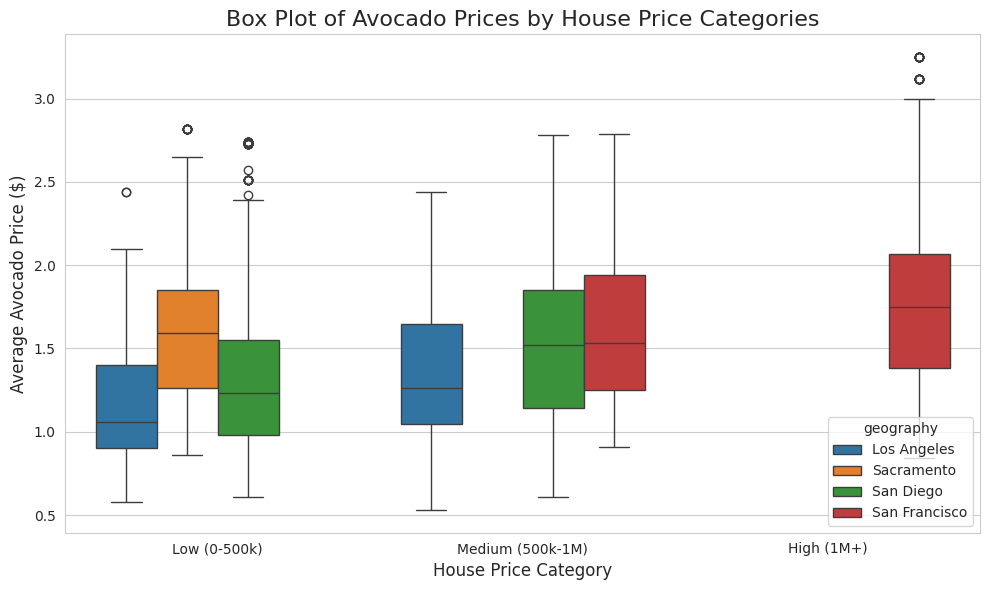

In [272]:
# Bin house prices into categories
combined_data['House_Price_Bin'] = pd.cut(combined_data['Median_Sale_Price'],
                                                  bins=[0, 500000, 1000000, 1500000],
                                                  labels=['Low (0-500k)', 'Medium (500k-1M)', 'High (1M+)'])

#box plot for avocado prices within each house price category
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_data, x='House_Price_Bin', y='average_price', hue='geography')

#Labels
plt.title('Box Plot of Avocado Prices by House Price Categories', fontsize=16)
plt.xlabel('House Price Category', fontsize=12)
plt.ylabel('Average Avocado Price ($)', fontsize=12)

plt.tight_layout()
plt.show()

This boxplot was the best type of plot that I tried  in order to visualize the data in a simple way. This box plot shows the distribution of average avocado prices for different levels of house prices for each city. As you can see, there is no strong evidence that avocado prices are correlated to hosuing prices.